# Project - 2 -Advanced Computer Vision
### By Ajay Kumar

### **Face recognition**

**CONTEXT**: Company X intends to build a face identification model to recognise human faces.

**DATA DESCRIPTION:** The dataset comprises of images and its mask where there is a human face.

**PROJECT  OBJECTIVE**: Face  Aligned  Face  Dataset  from  Pinterest.  This  dataset  contains  10,770  images  for  100  people.  All  images  are  taken from 'Pinterest' and aligned using dlib library. 

**TASK:** In  this  problem,  we  use  a  pre-trained  model  trained  on  Face  recognition  to  recognise  similar  faces.  Here,  we  are  particularly interested in recognising whether two given faces are of the same person or not. Below are the steps involved in the project
 


# Q1• Load the dataset and create the metadata.

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Changing current working directory to project folder
% cd '/content/drive/MyDrive/AIML/DL/Adv Comp Project'

/content/drive/MyDrive/AIML/DL/Adv Comp Project


### Extracting the zip file
- Extracting Aligned Face Dataset from Pinterest.zip

In [20]:
# from zipfile import ZipFile
# with ZipFile('Aligned Face Dataset from Pinterest.zip', 'r') as zip:
#   zip.extractall()

In [21]:
!ls -l # Checking the files and folders in present working directory

total 3172345
-rw-------   1 root root       3344 Jul 15 17:43  generate_dataset.py
-rw-------   1 root root      52325 Jul 24 09:57 'Part 1Test Data - Prediction Image (1).jpeg'
-rw-------   1 root root 1356868279 Jul 27 07:12 'Part 1- Train data - images.npy'
-rw-------   1 root root  830916446 Jul 27 14:19 'Part 1- Train data - images.npy.zip'
-rw-------   1 root root      30905 Jul 28 04:56 'Part 2- Test Image - Benedict Cumberbatch9.jpg'
-rw-------   1 root root      24417 Jul 28 04:56 'Part 2 - Test Image - Dwayne Johnson4.jpg'
-rw-------   1 root root  478756252 Jul 25 03:17 'Part 3 - Aligned Face Dataset from Pinterest.zip'
-rw-------   1 root root     254720 Jul 28 09:48 'Part 3.ipynb'
-rw-------   1 root root  580085408 Jul 25 03:16 'Part 3 - vgg_face_weights.h5'
-rw-------   1 root root     322551 Jul 27 16:08 'PART_ONE_Project _2_Advanced Computer Vision.ipynb'
-rw-------   1 root root    1099216 Jul 25 07:13 'PART_TWO_Project - 2 -Advanced Computer Vision (1).ipynb'
-rw---


### - Defining a function to load the images from the extracted folder and mapping each image with person id 


In [22]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        self.base = base
        self.name = name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

metadata = load_metadata('PINS')

In [141]:
# Creating the labels
labels = np.array([meta.name for meta in metadata])
labels

array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul', ...,
       'pins_zendaya', 'pins_zendaya', 'pins_zendaya'], dtype='<U29')

In [23]:
# Checking the shape
metadata.shape

(10770,)

There are 10770 images

# Q2• Check some samples of metadata.

In [24]:
# OpenCV loads images with color channels in BGR order. So we need to reverse them
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    return img[...,::-1]

#### Loading a sample image
- Loading one image using the function "load_image"

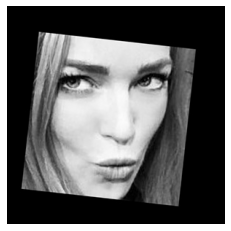

In [35]:
# Loading an image
import tensorflow
import matplotlib.pyplot as plt
plt.imshow(load_image(metadata[1000].image_path()))
plt.axis('off')
plt.show()

### Random visualization of sample images

In [145]:
n = np.random.randint(1, len(metadata))
img_path = metadata[n].image_path()
img = load_image(img_path)

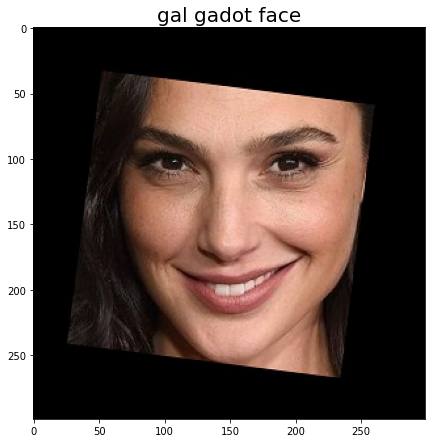

In [146]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
title = labels[n].split('_')[1]
ax.set_title(title, fontsize = 20)
_ = plt.imshow(img)

# Q3• Load the pre-trained model and weights

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Loading the the model defined above
- Then loading the given weight file

In [37]:
from tensorflow.keras.models import model_from_json
model = vgg_face()
model.load_weights('/content/drive/MyDrive/AIML/DL/Adv Comp Project/Part 3 - vgg_face_weights.h5')

### Get vgg_face_descriptor

In [38]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generating embeddings for each image in the dataset


In [39]:
# Getting embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtaining embedding vector for an image
# Getting the embedding vector for the above image using vgg_face_descriptor model and printing the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


# Q4• Generate Embedding vectors for each face in the dataset

#### Embeddings for all images
- Writing code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and storing in a list with name `embeddings`

- If there is any error in reading any image in the dataset, we will fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [40]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
    try:
        img = load_image(m.image_path())
        # scale RGB values to interval [0,1]
        img = cv2.resize(img, dsize = (224,224))
        img = (img / 255.).astype(np.float32)
        # obtain embedding vector for image
        embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    except Exception as e:
        print(str(e))
        print(i,m)

# Q5• Build distance metrics for identifying the distance between two given images

In [41]:
# Functions to calculate the distance
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plotting images and getting distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

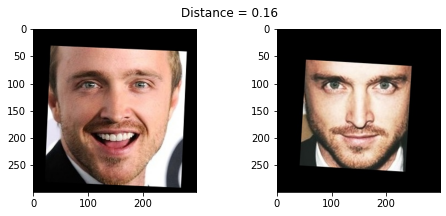

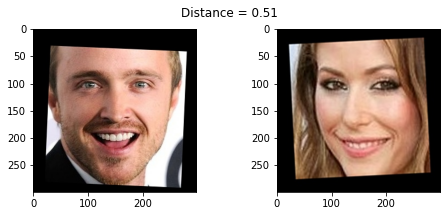

In [48]:
# Visalizing the image based on their distance
def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(11,12)
show_pair(11, 250)

We can see the similler images have lower distnce

where as disimiller images have higher distance 

### Creating train and test sets

In [53]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])
y_train = targets[train_idx]
y_test = targets[test_idx]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9573, 2622)
(9573,)
(1197, 2622)
(1197,)


### Encoding the Labels

In [56]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train) # Numerical encoding of identities
y_test = encoder.transform(y_test) # Transforming the test labels

I have used labelencoder to convert the categorical data to integer 

In [57]:
# Checking the converted labels
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

There are total 100 labels in traget class

### Standardizing the feature values

In [54]:
# Standarizing features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
# Checking the normalised features
import pandas as pd
df = pd.DataFrame(X_train)
print(df.shape)
df.head()

(9573, 2622)


0         1         2     ...      2619      2620      2621
0  2.537795 -0.060486 -1.459120  ...  0.370847 -0.390003  0.841463
1  1.798014 -0.068836 -1.473319  ...  0.508280 -1.105475  0.596937
2  0.442342 -0.401692 -0.420301  ...  0.818729 -1.117507  0.175841
3  2.335727 -0.432580 -0.208018  ...  1.518148 -0.844689 -1.047839
4  3.482255 -0.229712 -0.221245  ...  0.472794 -0.818220 -0.083807

[5 rows x 2622 columns]

There are 2633 normalised features and 9573 records

Using PCA for dimentionality reduction as there are 2633 features in the dataset

# Q6• Use PCA for dimensionality reduction

In [64]:
from sklearn.decomposition import PCA
# Taking the attribute count 2622 except the target column.
features = 2622
pca = PCA(n_components=features)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2622, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [67]:
print("Eigen Values :")
print("====================")
eigen_values = pca.explained_variance_
eigen_values

Eigen Values :


array([3.56332185e+02, 1.41556635e+02, 1.04633715e+02, ...,
       4.39826417e-06, 4.33850585e-06, 2.41069627e-07])

In [66]:
print("Eigen Values :")
print("====================")
print(pca.explained_variance_ratio_)

Eigen Values :
[1.35886713e-01 5.39823981e-02 3.99019011e-02 ... 1.67727106e-09
 1.65448232e-09 9.19315196e-11]


In [81]:
total = sum(eigen_values)
var_exp = [(i/total)*100 for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained:', cum_var_exp)
print('Cumulative Variance Explained with 90%:', cum_var_exp[150])

Cumulative Variance Explained: [ 13.58867132  18.98691113  22.97710123 ...  99.99999983  99.99999999
 100.        ]
Cumulative Variance Explained with 90%: 88.3408877070021


From the above 150 PCA components are able to explain 88% variance of the dataset.

So I am proceeding with 150 PCA components

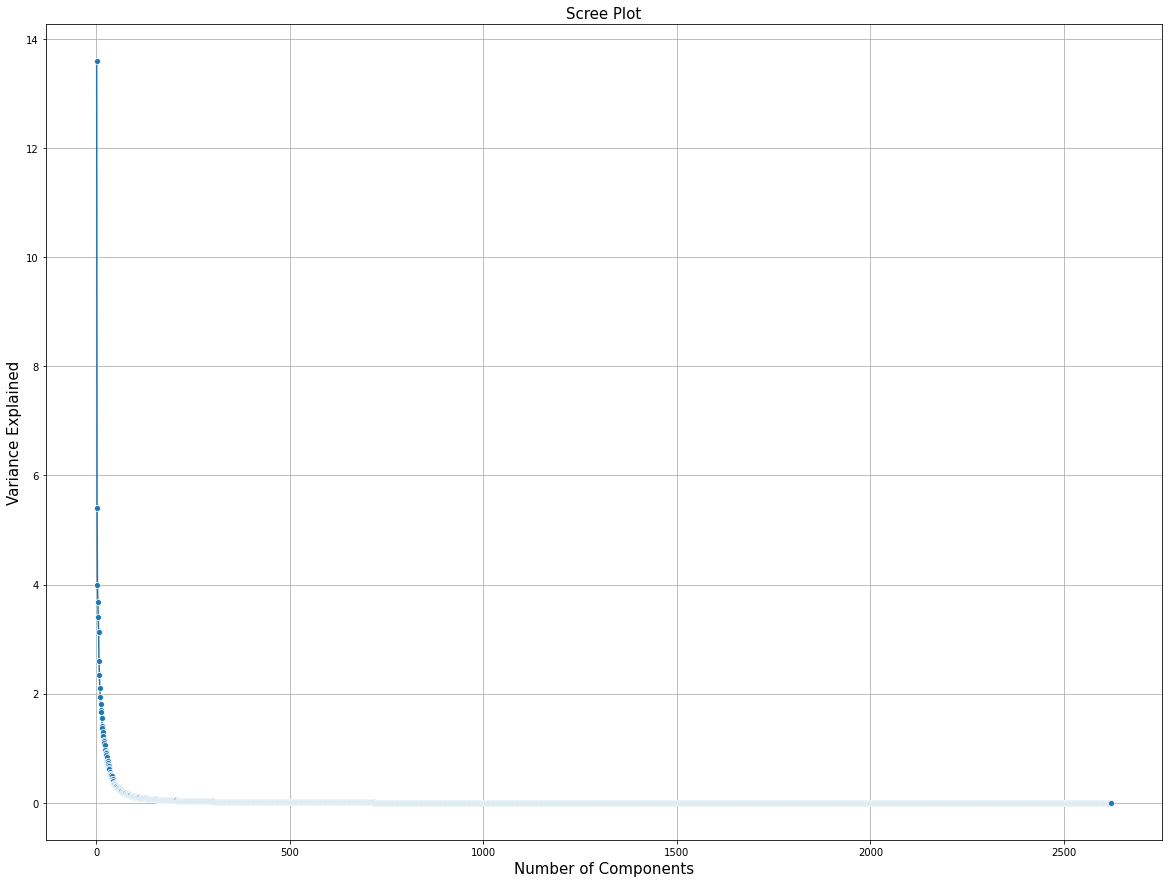

In [73]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.lineplot(x = range(1, 2623), y = var_exp, marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

As the no. of features are very large so it is very difficult to visualise the elbow

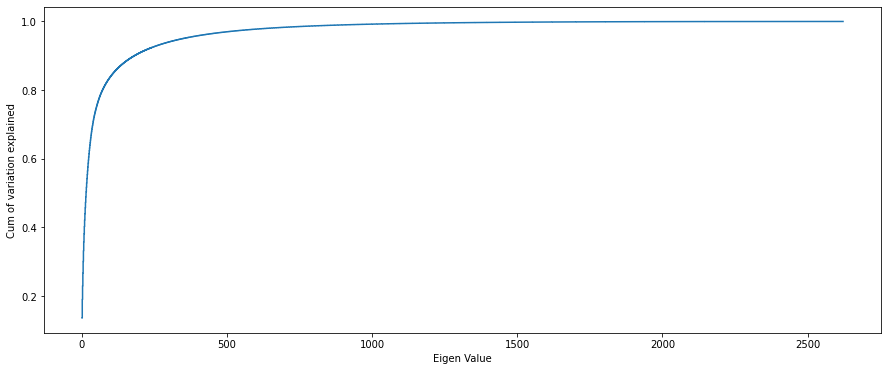

In [74]:
fig1 = plt.figure(figsize=(15,6))
plt.step(list(range(1,(features+1))),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen Value')
plt.show()

Cum of variation explained of the total features

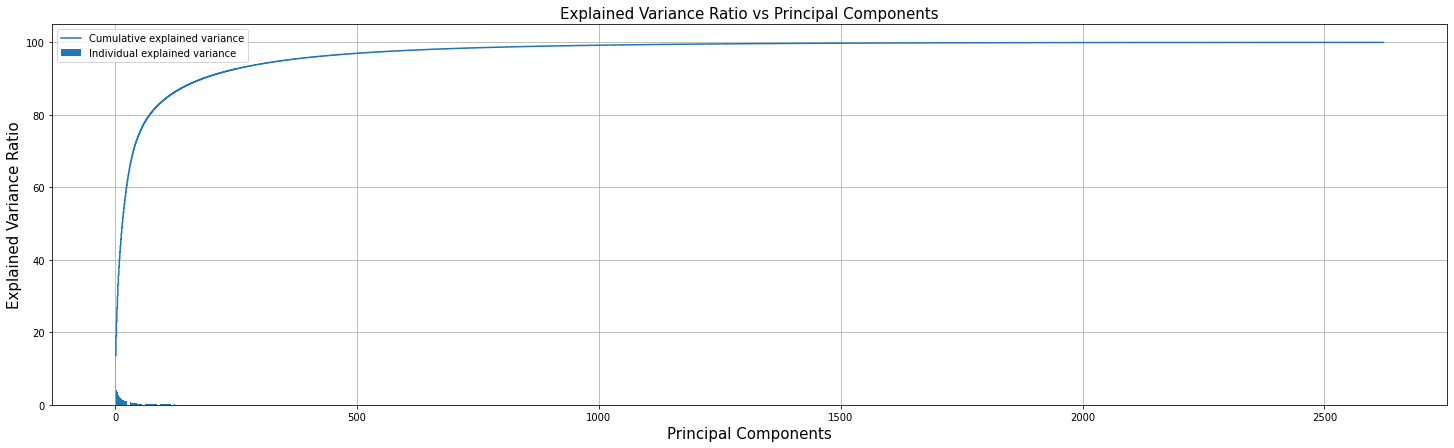

In [83]:
plt.figure(figsize=(25,7))
plt.bar(range(1,2623),var_exp,  width=0.8, label= 'Individual explained variance',)
plt.step(range(1,2623),cum_var_exp,  where='mid', label= 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=15)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=15)
plt.legend()
plt.grid()
plt.show()

Explained Variance Ratio vs Principal Components

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150, svd_solver='randomized', whiten=True)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Q7• Build an SVM classifier in order to map each image to its right person

In [88]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', class_weight=None)
clf.fit(X_train, y_train)
print('Training data score:',clf.score(X_train, y_train))
print('Test data score:',clf.score(X_test, y_test))

Training data score: 0.9982241721508409
Test data score: 0.9624060150375939


The svm model is giving 100% accuracy on training data

The svm model is giving 96% accuracy on test data

In [136]:
# Predicting on test
y_pred = clf.predict(X_test)
y_pred

array([ 0,  0,  0, ..., 99, 99, 99])

In [138]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
labels = np.array([meta.name for meta in metadata])
names = [name.split('_')[1].title().strip() for name in labels]

# Classification Report
print('Classification Report: \n{}'.format(classification_report(y_test, y_pred, target_names = np.unique(names))))

Classification Report: 
                          precision    recall  f1-score   support

              Aaron Paul       1.00      1.00      1.00        10
      Alexandra Daddario       1.00      1.00      1.00        10
            Alvaro Morte       1.00      1.00      1.00        13
Alycia Debnam Carey Face       1.00      0.92      0.96        13
             Amanda Crew       1.00      1.00      1.00         7
          Amaury Nolasco       1.00      1.00      1.00         9
        Amber Heard Face       1.00      0.88      0.93         8
               Anna Gunn       0.93      1.00      0.97        14
           Anne Hathaway       1.00      1.00      1.00        14
     Barbara Palvin Face       0.89      0.89      0.89         9
      Bellamy Blake Face       0.76      1.00      0.87        13
    Benedict Cumberbatch       1.00      1.00      1.00        13
            Betsy Brandt       1.00      1.00      1.00         9
              Bill Gates       1.00      1.00      

The above classification report says the svm model is giving very good accuracy in predicting images as seen above

# Q8• Import the the test image. Display the image. Use the SVM trained model to predict the face.

### Test results
- Taking 10th image from test set and plot the image
- Reporting to which person(folder name in dataset) the image belongs to

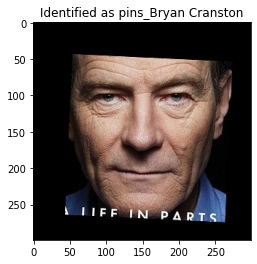

In [134]:
# Testing from the splited data
example_idx = 100

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = clf.predict([X_test[example_idx]])
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

Here the model is correctly predicting the displayed image as Bryan Cranston

In [ ]:
# Displaying the test image
import tensorflow
test_img1 = '/content/drive/MyDrive/AIML/DL/Adv Comp Project/Part 2 - Test Image - Dwayne Johnson4.jpg'
test_img2 = '/content/drive/MyDrive/AIML/DL/Adv Comp Project/Part 2- Test Image - Benedict Cumberbatch9.jpg'

In [100]:
# Defining a function to normalize the test data
def read_image(path):
    x = cv2.imread(path, cv2.IMREAD_COLOR)
    x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    x = cv2.resize(x, (224,224))
    x = x/255.0
    return x

In [101]:
# Displaying the actual test images
test_img1 = read_image(test_img1)
test_img2 = read_image(test_img2)

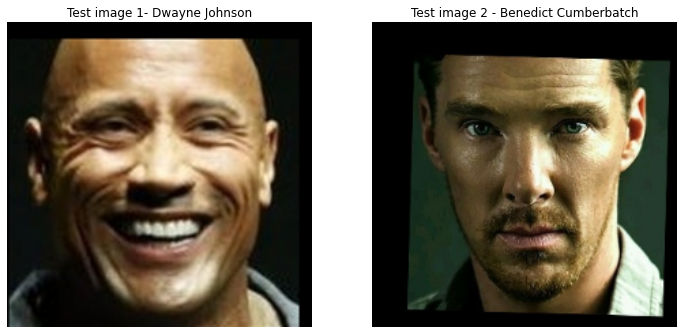

In [135]:
#Create a pyplot with two images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 8))

#Show both images
ax1.set_title('Test image 1- Dwayne Johnson')
ax1.imshow(test_img1, cmap = 'seismic', interpolation = 'bilinear')
ax1.axis('off')
ax2.set_title('Test image 2 - Benedict Cumberbatch')
ax2.imshow(test_img2, cmap = 'gray', interpolation = 'bilinear')
ax2.axis('off')
plt.show()

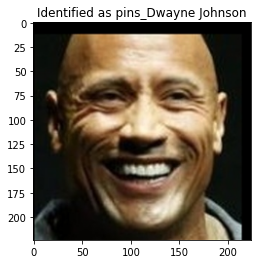

In [130]:
# Predicting on test image 1

test_img_path= '/content/drive/MyDrive/AIML/DL/Adv Comp Project/Part 2 - Test Image - Dwayne Johnson4.jpg'

sample_img = load_image(test_img_path)
sample_img = (sample_img/255.).astype(np.float32)
  # Resize
sample_img = cv2.resize(sample_img, (224, 224))

sample_image_scal = sc.transform([embeddings[test_idx][230]])
sample_image_pca = pca.transform(sample_image_scal)
sample_prediction = clf.predict(sample_image_pca)
sample_identity = encoder.inverse_transform(sample_prediction)[0]

plt.imshow(sample_img)
plt.title(f'Identified as {sample_identity}');

The svm model is correctly identifying the provided test image 1 as Dwayne Johnson

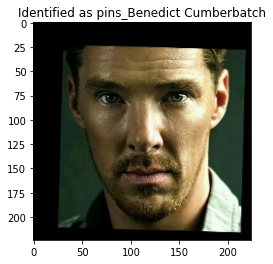

In [133]:
# Predicting on test image 2

test1_image_path ='/content/drive/MyDrive/AIML/DL/Adv Comp Project/Part 2- Test Image - Benedict Cumberbatch9.jpg'


sample_img1 = load_image(test1_image_path)
sample_img1 = (sample_img1/255.).astype(np.float32)
sample_img1 = cv2.resize(sample_img1, (224, 224))

sample_image1_scal = sc.transform([embeddings[test_idx][60]])
sample_image1_pca = pca.transform(sample_image1_scal)
sample_prediction1 = clf.predict(sample_image1_pca)
sample_identity1 = encoder.inverse_transform(sample_prediction1)[0]

plt.imshow(sample_img1)
plt.title(f'Identified as {sample_identity1}');

The svm model is correctly identifying the provided test image 1 as Benedict Cumberbatch


Final Conclusion:

1. VGG model with pre-trained weights was used to generate embeddings for each images in the dataset.

2. I calculated the distance between two pair of images and plotted.

3. Total 2,622 features for each image, PCA was used for dimension reduction after standardizing the features.

4. With an cumulative explained variance of 88%, 150 PCA components were used.

5. Using SVC predicted the labels for test dataset with an accuracy of 96%.

6. I compared predicted and actual labels for a given sample image as well as image from test dataset and model is predicting corectly.